### The Machine Learning Workflow

### 1. Define Business Goal:
- Achieve high accuracy on titanic kaggle data set
- Rough guide (kaggle test score submissions):
    - EASY: >75%
    - MEDIUM: >77.5%
    - HARD: >80%

### 2. Get Data
- Data comes in 2 csv files
    - `train.csv` <--Only use this for now!!!
    - `test.csv` <---Only need this later in the week!!

In [92]:
import pandas as pd
df = pd.read_csv('train.csv')
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

%matplotlib inline

Split the data into X and y
- Supervised Learning

In [93]:
X = df.drop('Survived', axis=1)
X = df[['Age', 'Sex', 'Pclass', 'Embarked','Cabin']]

In [132]:
df['Cabin']=df['Cabin'].str[0]

In [95]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [96]:
y = df['Survived']

In [97]:
type(X)

pandas.core.frame.DataFrame

In [98]:
X.shape #matrix, multi-dimensional (M, N)

(891, 5)

In [99]:
y.shape #vector, single array (M, )

(891,)

### 3. Train-Test-Split

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#80% -> training, 20% -> testing

In [101]:
X_train.head()

,Age,Sex,Pclass,Embarked,Cabin
331,45.5,male,1,S,C124
733,23.0,male,2,S,NaN
382,32.0,male,3,S,NaN
704,26.0,male,3,S,NaN
813,6.0,female,3,S,NaN


In [102]:
explore_train_df = pd.concat([X_train, y_train], axis=1)
etdf = pd.concat([X_train, y_train], axis=1)

### 4. Exploratory Data Analysis (EDA)
- Your task for today! :)

In [103]:
explore_train_df.head()

,Age,Sex,Pclass,Embarked,Cabin,Survived
331,45.5,male,1,S,C124,0
733,23.0,male,2,S,NaN,0
382,32.0,male,3,S,NaN,0
704,26.0,male,3,S,NaN,0
813,6.0,female,3,S,NaN,0


In [104]:
etdf.describe()

,Age,Pclass,Survived
count,572.000000,712.000000,712.000000
mean,29.498846,2.330056,0.376404
std,14.500059,0.824584,0.484824
min,0.420000,1.000000,0.000000
25%,21.000000,2.000000,0.000000
50%,28.000000,3.000000,0.000000
75%,38.000000,3.000000,1.000000
max,80.000000,3.000000,1.000000


444
268


Text(0, 0.5, 'Frequency')

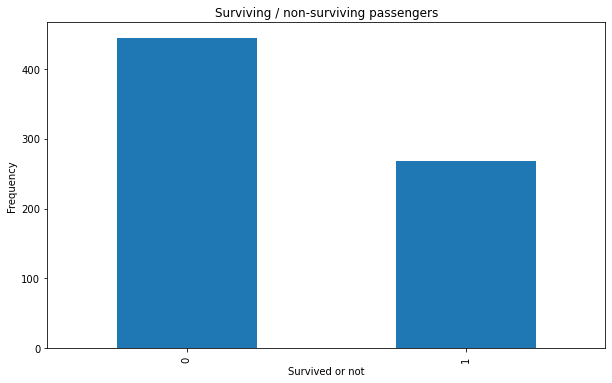

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline

print(len(etdf[etdf['Survived']==0]))
print(len(etdf[etdf['Survived']==1]))

ax = etdf['Survived'].value_counts().plot.bar(figsize=(10,6), title="Surviving / non-surviving passengers")
ax.set_xlabel("Survived or not")
ax.set_ylabel("Frequency")

In [106]:
#Step 3

#Calculate the proportion of surviving 1st class passengers with regards to the total number of 1st class passengers.

survivingfirst = len(etdf[(etdf['Survived']==1) & (etdf['Pclass']==1)])
totalfirst=len(etdf[etdf['Pclass']==1])
print('The proportion of surviving 1st class passengers with regards to the total number of 1st class passengers: ')
print(survivingfirst * 100 / totalfirst)


The proportion of surviving 1st class passengers with regards to the total number of 1st class passengers: 
60.736196319018404


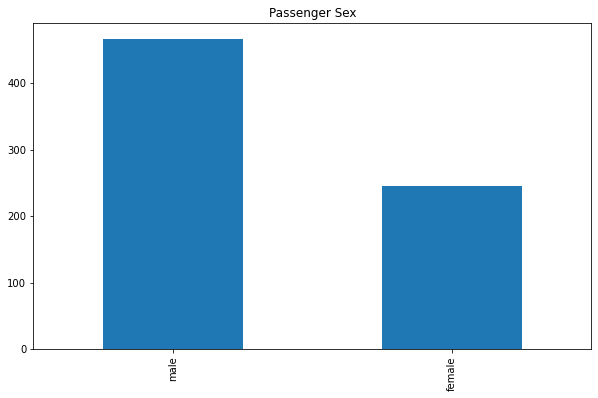

In [107]:
# Step 4
# Create a bar plot with separate bars for male/female passengers and 1st/2nd/3rd class passengers.


ax = etdf['Sex'].value_counts().plot.bar(figsize=(10,6), title="Passenger Sex")

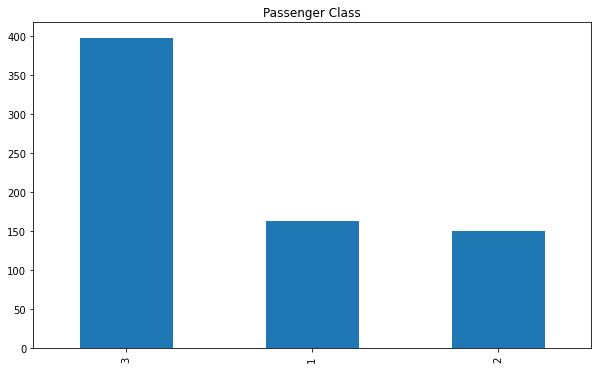

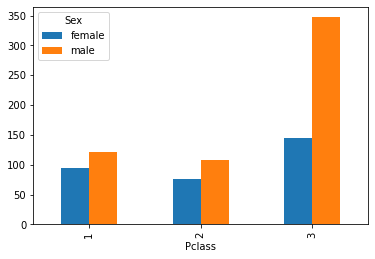

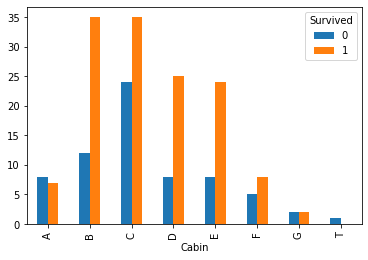

In [108]:
ax = etdf['Pclass'].value_counts().plot.bar(figsize=(10,6), title="Passenger Class")

speciessex=df.groupby(['Pclass', 'Sex'])['Sex'].count().unstack().plot.bar()

speciessex=df.groupby(['Cabin', 'Survived'])['Survived'].count().unstack().plot.bar()

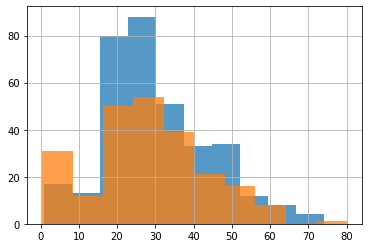

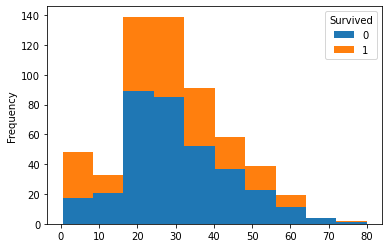

In [109]:
# Step 5
# Create a histogram showing the age distribution of passengers. Compare surviving/non-surviving passengers.

etdf.groupby(['Survived'])['Age'].hist(bins=10,  alpha=0.75, stacked = True)

etdf.pivot(columns='Survived').Age.plot(kind = 'hist', stacked=True)


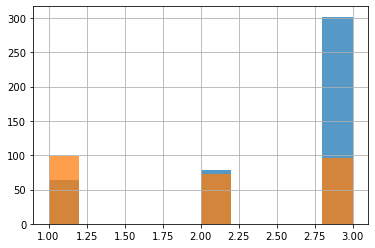

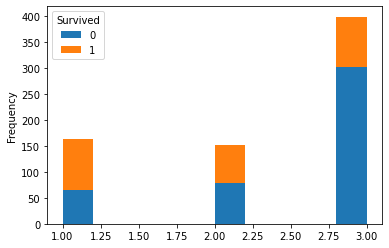

In [110]:
etdf.groupby(['Survived'])['Pclass'].hist(bins=10,  alpha=0.75, stacked = True)

etdf.pivot(columns='Survived').Pclass.plot(kind = 'hist', stacked=True)


In [111]:
# Step 6
# Calculate the average age for survived and drowned passengers separately.

etdf.groupby(['Survived'])['Age'].mean()

etdf.groupby(['Survived'])['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,340.0,30.213235,13.970343,1.00,21.00,28.0,39.00,74.0
1,232.0,28.451897,15.213220,0.42,19.75,28.0,36.25,80.0


In [112]:
# Replace missing age values by the mean age.
# print(etdf['Age'].head(50))

meanage = etdf['Age'].mean()
# print('** Mean age: ' + str(meanage))
etdf[np.isnan(etdf['Age'])] = meanage

# etdf['Age'].head(50)

In [113]:
# Step 8

# Create a table counting the number of surviving/dead passengers separately for 1st/2nd/3rd class and male/female.

# pd.crosstab(etdf,['Pclass','Survived'])
pd.crosstab(index=etdf['Pclass'],columns=etdf['Survived'])

pd.crosstab(index=etdf['Survived'],columns=[etdf['Pclass'],etdf['Sex']])

Pclass    1.000000       2.000000       3.000000                29.498846
Sex          female male    female male    female male 29.498846153846156
Survived                                                                 
0.000000          3   48         2   70        45  172                  0
1.000000         64   28        56   13        37   34                  0
29.498846         0    0         0    0         0    0                140

In [114]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 5), (179, 5), (712,), (179,))

In [115]:
### 4. Feature Engineering

#**Strategies that help the model understand our data better**

#### Using Column Transformers

#1. fit using training data
#2. transform using training data
#3. transform using new data (test or prediction data)
#4. **DO NOT** fit on test or prediction data

In [116]:
X_train.head()

,Age,Sex,Pclass,Embarked,Cabin
331,45.5,male,1,S,C124
733,23.0,male,2,S,NaN
382,32.0,male,3,S,NaN
704,26.0,male,3,S,NaN
813,6.0,female,3,S,NaN


In [117]:
impute_then_scale = make_pipeline(
    SimpleImputer(strategy='median'),
    MinMaxScaler()
)

In [118]:
# Malte: you  should have exactly 1 ColumnTransformer in your notebook

fe = ColumnTransformer([
    ('impute and scale', impute_then_scale, ['Age']),
    # fill missing values
    
    # convert gender to binary columns
    ('onehot', OneHotEncoder(sparse=False, handle_unknown='ignore'), ['Sex']), 
    
    # normalize to 0.0 .. 1.0
    ('scaler', MinMaxScaler(), ['Pclass']),    
    
    #('do_nothing', 'passthrough', ['Body Mass (g)'])
    # label         name of CT     columns to be transformed
])

In [119]:
fe.fit(X_train)
Xtrans = fe.transform(X_train)

In [120]:
Xtrans.round(2)[:10]

array([[0.57, 0.  , 1.  , 0.  ],
       [0.28, 0.  , 1.  , 0.5 ],
       [0.4 , 0.  , 1.  , 1.  ],
       [0.32, 0.  , 1.  , 1.  ],
       [0.07, 1.  , 0.  , 1.  ],
       [0.3 , 0.  , 1.  , 0.  ],
       [0.56, 0.  , 1.  , 0.  ],
       [0.36, 0.  , 1.  , 0.5 ],
       [0.35, 0.  , 1.  , 1.  ],
       [0.35, 0.  , 1.  , 0.  ]])

In [121]:
Xtrans_test = fe.transform(X_test)

In [122]:
### 5. Train the model

In [123]:
from sklearn.linear_model import LogisticRegression

In [124]:
# 1. create a model
model = LogisticRegression()  # creates a fresh model with parameters not fitted
# 2. train with training data
model.fit(Xtrans, y_train)  # <-- does the differential calculus optimization gradient descent magic

LogisticRegression()

In [125]:
### 6. Evaluate the model

In [126]:
round(model.score(Xtrans, y_train), 3)  # --> train accuracy

0.789

In [127]:
round(model.score(Xtrans_test, y_test), 3)  # --> test accuracy

0.788

In [128]:
### 7. Make predictions

In [129]:
passanger = pd.DataFrame([[55, 'male', 2], 
                      [20, 'female', 1]],
                     columns=['Age','Sex','Pclass'])
passanger

,Age,Sex,Pclass
0,55,male,2
1,20,female,1


In [130]:
Xtrans_passanger = fe.transform(passanger)

ValueError: Number of features of the input must be equal to or greater than that of the fitted transformer. Transformer n_features is 5 and input n_features is 3.

In [ ]:
Xtrans_passanger

In [ ]:
model.predict(Xtrans_passanger)

In [ ]:
pred = model.predict_proba(Xtrans_passanger)
pred

In [ ]:
model.classes_
pd.DataFrame(pred, columns=model.classes_)